
Le dataset Heart Disease a été collecté à partir de quatre bases de données : Cleveland (USA), Hongrie, Suisse, et VA Long Beach (USA).
Il contient des données médicales sur environ 1000 patients examinés dans les années 1980 pour évaluer la présence de maladie coronarienne.
Les 14 attributs clés utilisés dans la plupart des études incluent des variables démographiques, cliniques et liées aux tests diagnostiques (âge, sexe, type de douleur thoracique,
pression artérielle au repos, cholestérol, glycémie, résultats ECG, fréquence cardiaque maximale, angine d'effort, dépression du segment ST, nombre de vaisseaux atteints, etc.).

La variable cible `num` indique la présence de maladie coronarienne, codée de 0 (absence) à 4 (sévérité), mais la classification binaire (maladie oui/non) est généralement privilégiée.

Cette étude vise à comprendre les facteurs influençant la maladie coronarienne et à visualiser les relations entre variables cliniques et diagnostic.

Les données sont anonymisée

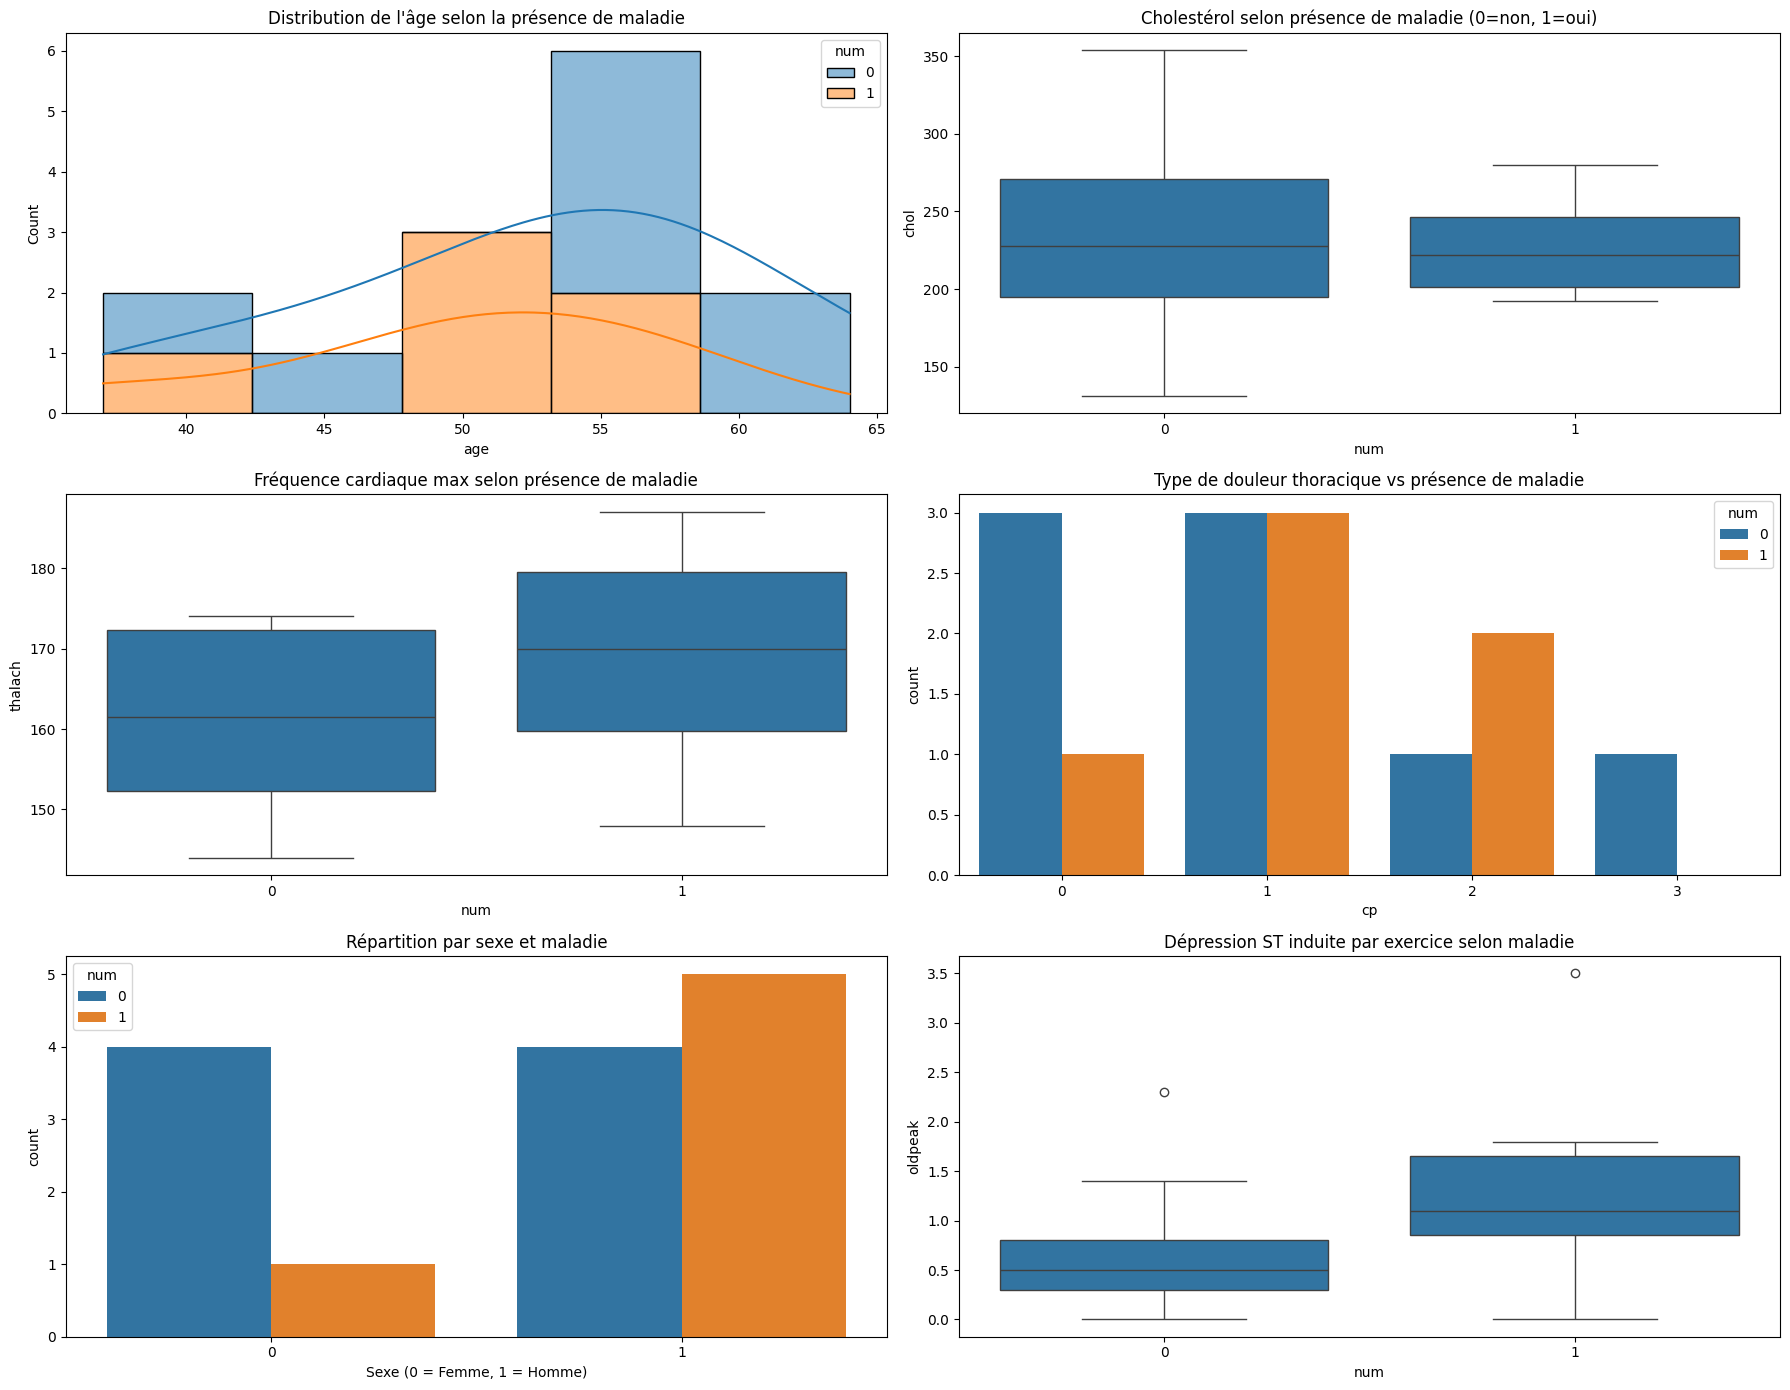

In [5]:
# Étude complète et analyse du dataset Heart Disease UCI

# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description complète de l'étude
etude_complète = """
Le dataset Heart Disease a été collecté à partir de quatre bases de données : Cleveland (USA), Hongrie, Suisse, et VA Long Beach (USA).
Il contient des données médicales sur environ 1000 patients examinés dans les années 1980 pour évaluer la présence de maladie coronarienne.
Les 14 attributs clés utilisés dans la plupart des études incluent des variables démographiques, cliniques et liées aux tests diagnostiques (âge, sexe, type de douleur thoracique,
pression artérielle au repos, cholestérol, glycémie, résultats ECG, fréquence cardiaque maximale, angine d'effort, dépression du segment ST, nombre de vaisseaux atteints, etc.).

La variable cible `num` indique la présence de maladie coronarienne, codée de 0 (absence) à 4 (sévérité), mais la classification binaire (maladie oui/non) est généralement privilégiée.

Cette étude vise à comprendre les facteurs influençant la maladie coronarienne et à visualiser les relations entre variables cliniques et diagnostic.

Les données sont anonymisées, sans noms ni numéros de sécurité sociale.

Cleveland est la base la plus utilisée dans la recherche ML.

Référence principale : R. Detrano et al., 1989, American Journal of Cardiology.
"""

print(etude_complète)

# Exemple de chargement de données (extrait réduit pour démonstration)
data = {
    'age': [63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64],
    'sex': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    'cp': [1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 3],
    'trestbps': [145,130,130,120,120,140,140,120,172,150,139,125,145,122],
    'chol': [233,250,204,236,354,192,294,263,199,168,131,280,208,222],
    'fbs': [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'restecg': [0,1,0,1,1,1,0,1,1,1,0,1,1,0],
    'thalach': [150,187,172,178,163,148,153,173,162,174,144,159,180,160],
    'exang': [0,0,0,0,1,0,0,0,0,0,0,0,1,0],
    'oldpeak': [2.3,3.5,1.4,0.8,0.6,1.0,0.6,0.0,1.2,0.0,0.4,1.8,0.0,0.4],
    'slope': [3,2,2,3,1,3,1,2,2,2,3,2,2,3],
    'ca': [0,0,0,0,0,0,0,0,0,0,2,2,0,0],
    'thal': [6,3,3,3,3,3,3,3,7,7,3,3,7,3],
    'num': [0,1,0,1,0,1,0,0,1,0,0,1,1,0]
}

# Chargement en DataFrame
heart_df = pd.DataFrame(data)

# Analyse descriptive
print("\n--- Aperçu des données ---")
print(heart_df.head())

print("\n--- Statistiques descriptives ---")
print(heart_df.describe())

print("\n--- Distribution des classes (numéro diagnostic) ---")
print(heart_df['num'].value_counts())

# Analyse de corrélation
print("\n--- Matrice de corrélation ---")
print(heart_df.corr()['num'].sort_values(ascending=False))

# Visualisations graphiques
plt.figure(figsize=(18,14))

# 1. Distribution de l'âge par présence de maladie
plt.subplot(3, 2, 1)
sns.histplot(data=heart_df, x='age', hue='num', multiple='stack', kde=True)
plt.title("Distribution de l'âge selon la présence de maladie")

# 2. Cholestérol par présence de maladie
plt.subplot(3, 2, 2)
sns.boxplot(x='num', y='chol', data=heart_df)
plt.title("Cholestérol selon présence de maladie (0=non, 1=oui)")

# 3. Fréquence cardiaque maximale selon maladie
plt.subplot(3, 2, 3)
sns.boxplot(x='num', y='thalach', data=heart_df)
plt.title("Fréquence cardiaque max selon présence de maladie")

# 4. Type de douleur thoracique vs maladie
plt.subplot(3, 2, 4)
sns.countplot(x='cp', hue='num', data=heart_df)
plt.title("Type de douleur thoracique vs présence de maladie")

# 5. Répartition par sexe et maladie
plt.subplot(3, 2, 5)
sns.countplot(x='sex', hue='num', data=heart_df)
plt.title("Répartition par sexe et maladie")
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')

# 6. Relation entre oldpeak (dépression ST) et maladie
plt.subplot(3, 2, 6)
sns.boxplot(x='num', y='oldpeak', data=heart_df)
plt.title("Dépression ST induite par exercice selon maladie")

plt.tight_layout()
plt.show()


### Matrice de Corrélation Complète

Pour une analyse plus approfondie, visualisons la matrice de corrélation complète de toutes les variables du dataset. Cela nous permettra de voir les relations linéaires entre chaque paire de variables.

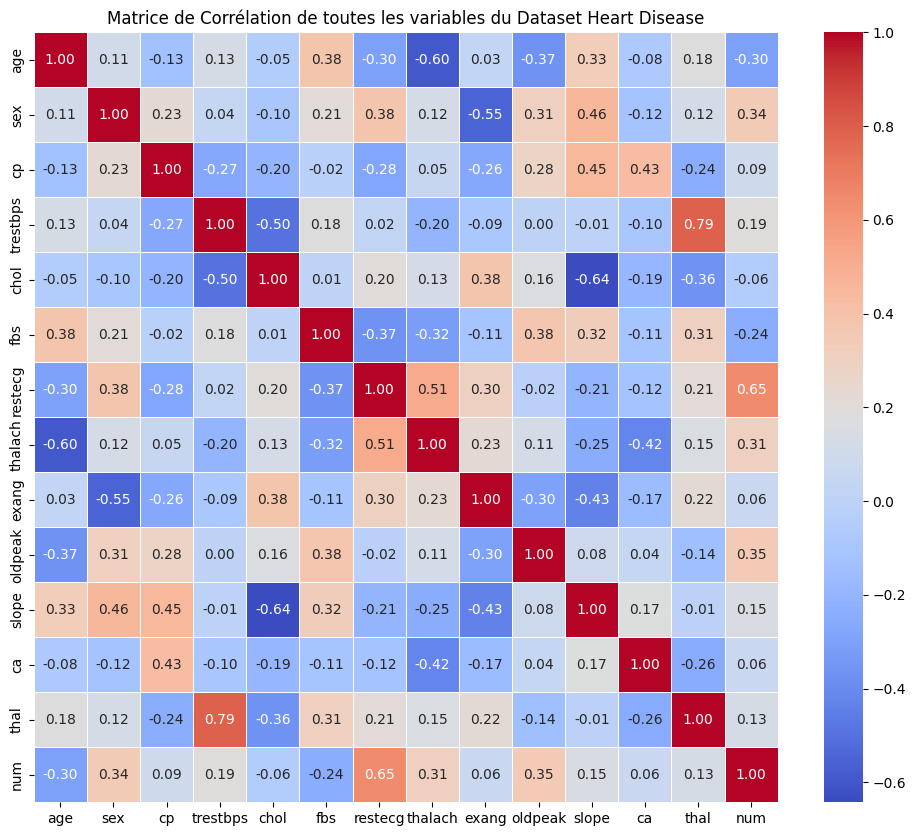

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation de toutes les variables du Dataset Heart Disease')
plt.show()